## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20,50)

In [3]:
y = -1*x + 2

#### Plot your data points. 

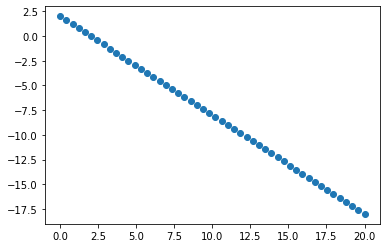

In [4]:
plt.scatter(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [5]:
def adagrad(x,y,e=0.001,alpha=0.001,beta = 0.8,iterations=500,min_gradient = 0.1):
    _x = np.c_[np.ones(x.shape[0]), x]
    theta = np.zeros(_x.shape[1])
    vt = np.zeros(_x.shape[1])
    predictions = []
    losses = []
    thetas = []
#     thetas.append(theta)
    for i in range(iterations):
        pred = np.dot(_x,theta)
        predictions.append(np.array(pred))
        error = pred-y
        gradient = (1/len(_x)) * np.dot(_x.T, error)
        #stopping condition for low gradient
        if gradient.all() < min_gradient:
            break
        vt = beta*vt + (1-beta)* gradient**2
        theta -= (alpha/(vt**0.5)+e) * gradient
#         print(theta)
        thetas.append(np.array(theta))
        loss = 1/(2*len(_x)) * np.dot(error.T, error)
        losses.append(np.array(loss))
    return np.array(thetas),np.array(losses),np.array(predictions)

In [6]:
thetas,losses,predictions = adagrad(x,y,alpha=0.01,beta = 0.8,iterations=500000)

In [7]:
thetas[-1]

array([ 1.99497055, -1.00538801])

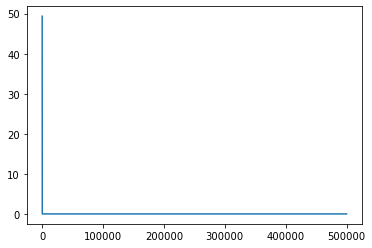

In [8]:
plt.plot(losses)

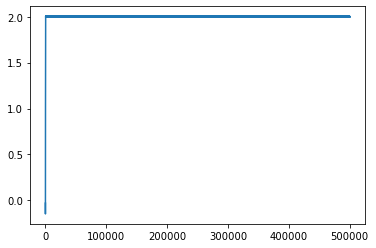

In [9]:
thetas =np.array(thetas)
plt.plot(np.arange(len(losses)),thetas[:,0])

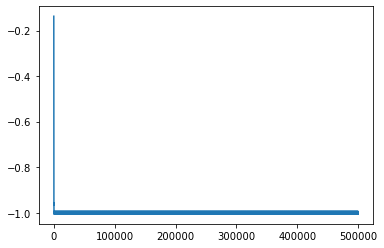

In [10]:
thetas =np.array(thetas)
plt.plot(np.arange(len(losses)),thetas[:,1])

In [11]:
r2_score(y, predictions[-1])

0.9998709418706144

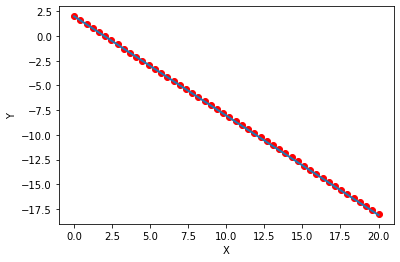

In [12]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
x_plot = np.c_[np.ones(x.shape[0]), x] 
plt.scatter(x, y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
y = np.dot(x_plot,thetas[-1])#theta[1]*x + theta[0]
line.set_data(x, y)
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [13]:
def rms_prob(x,y,e=0.0001,alpha=0.01,beta=0.7,iterations=10000):
    thetas = []
    predictions = []
    theta = np.zeros(2)
    vt = np.zeros(2)
    if len(x.shape) > 1:
        theta = np.zeros(x.shape[1]+1)
        vt = np.zeros(x.shape[1]+1)
    
    _x = np.c_[np.ones(x.shape[0]), x] 
    
    losses = []
    for i in range(iterations):
        pred = np.dot(_x,theta)
        predictions.append(np.array(pred))
#         print(pred)
        error = pred-y
        gradient = (1/len(_x)) * np.dot(_x.T, error)
        
        vt = vt*beta + (1-beta)*gradient**2
        
        theta -= (alpha/(vt**0.5)+e) * gradient
        thetas.append(np.array(theta))
        loss = 1/(2*len(_x)) * np.dot(error.T, error)
        losses.append(np.array(loss))
    return np.array(thetas),np.array(losses),np.array(predictions)

In [14]:
thetas,losses,predictions = rms_prob(x,y,alpha=0.005,beta=0.8,iterations=5000)

In [15]:
thetas[-1]

array([ 1.99246916, -1.00790622])

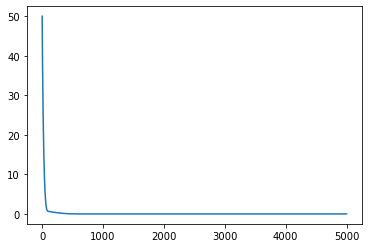

In [16]:
plt.plot(np.arange(len(losses)),losses)

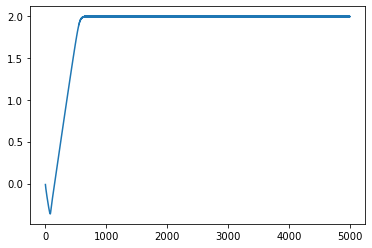

In [17]:
plt.plot(np.arange(len(losses)),thetas[:,0])

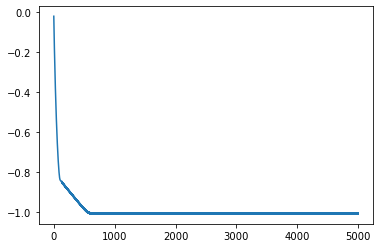

In [18]:
plt.plot(np.arange(len(losses)),thetas[:,1])

In [19]:
r2_score(y, predictions[-1])

0.9999718728911577

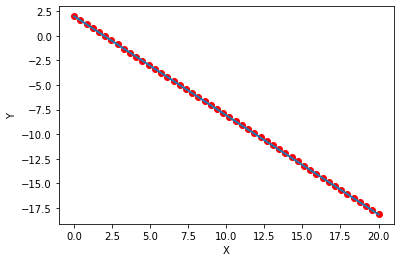

In [20]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
x_plot = np.c_[np.ones(x.shape[0]), x] 
plt.scatter(x, y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
y = np.dot(x_plot,thetas[-1])#theta[1]*x + theta[0]
line.set_data(x, y)
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [21]:
def adam(x,y,e=0.000000001,alpha=0.001,beta1=0.85,beta2 =0.9,iterations=10000):
    thetas = []
    predictions = []
    theta = np.zeros(2)
    vt = np.zeros(2)
    mt = np.zeros(2)
    if len(x.shape) > 1:
        theta = np.zeros(x.shape[1]+1)
        vt = np.zeros(x.shape[1]+1)
        mt = np.zeros(x.shape[1]+1)
        
    _x = np.c_[np.ones(x.shape[0]), x] 
    #these variables willbe used to save beta^t for each beta
    _beta1 = beta1
    _beta2 = beta2
    losses = []
    for i in range(1,iterations+1):
        pred = np.dot(_x,theta)
        predictions.append(np.array(pred))
        error = pred-y
        gradient = (1/len(_x)) * np.dot(_x.T, error)
#         mt/= (1-beta1**i)
#         vt/= (1-beta2**i)
        mt = vt*beta1 + (1-beta1)*gradient
        vt = vt*beta2 + (1-beta2)*(gradient**2)

        theta -= (alpha/(vt**0.5)+e) * gradient *mt
        thetas.append(np.array(theta))
        loss = 1/(2*len(_x)) * np.dot(error.T, error)
        losses.append(np.array(loss))
        #powering bias correction term
#         _beta1*=beta1
#         _beta2*=beta2
        
    return np.array(thetas),np.array(losses),np.array(predictions)

In [28]:
thetas,losses,predictions = adam(x,y,alpha=0.001,beta1=0.9,beta2 =0.99,iterations=100000)

In [29]:
thetas[-1]

array([ 1.53356185, -0.97383168])

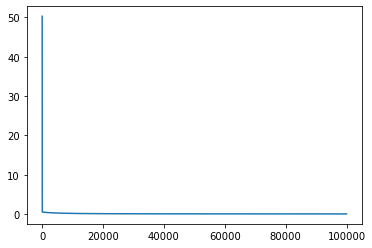

In [30]:
plt.plot(losses)

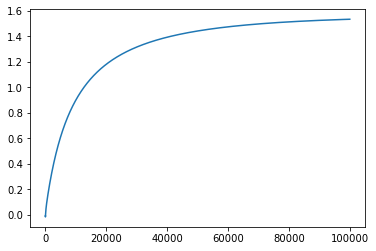

In [31]:
plt.plot(np.arange(len(losses)),thetas[:,0])

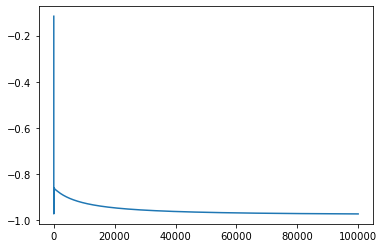

In [32]:
plt.plot(np.arange(len(losses)),thetas[:,1])

In [33]:
r2_score(y, predictions[-1])

0.9984609125672744

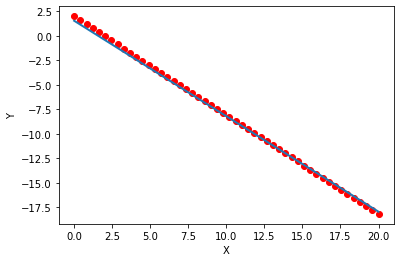

In [34]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
x_plot = np.c_[np.ones(x.shape[0]), x] 
plt.scatter(x, y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
y = np.dot(x_plot,thetas[-1])#theta[1]*x + theta[0]
line.set_data(x, y)
plt.show()

# comparison

In [35]:
thetas1,losses1,predictions1 = adagrad(x,y,alpha=0.01,beta = 0.8,iterations=100000)

In [36]:
thetas2,losses2,predictions2 = rms_prob(x,y,alpha=0.005,beta=0.8,iterations=100000)

In [38]:
thetas3,losses3,predictions3 = adam(x,y,alpha=0.001,beta1=0.9,beta2 =0.99,iterations=100000)

## Congratulations 
![image.png](attachment:image.png)

# adagrad loss , r2 score ,thetas vs loss

0.999863912708323


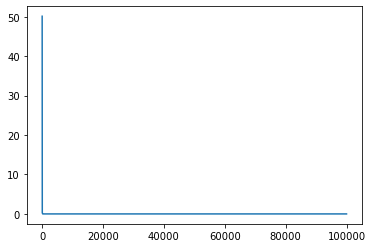

In [39]:
plt.plot(np.arange(len(losses1)),losses1)
print(r2_score(y, predictions1[-1]))

In [ ]:
plt.plot(np.arange(len(losses1)),thetas1[:,0])

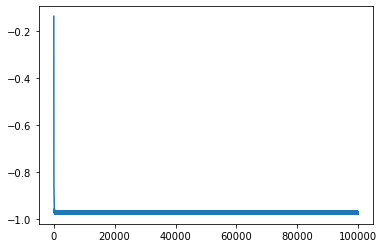

In [40]:
plt.plot(np.arange(len(losses1)),thetas1[:,1])

# rms prob loss, r2 score,thetas vs loss

0.9999700204779257


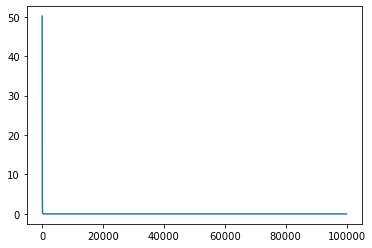

In [41]:
plt.plot(np.arange(len(losses2)),losses2)
print(r2_score(y, predictions2[-1]))

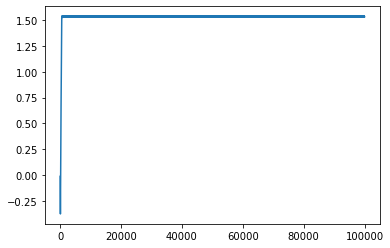

In [42]:
plt.plot(np.arange(len(losses2)),thetas2[:,0])

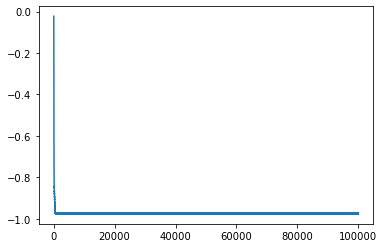

In [43]:
plt.plot(np.arange(len(losses2)),thetas2[:,1])

# adam ,loss r2 score ,thetas vs loss

0.99836926187899


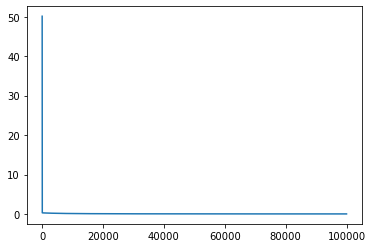

In [44]:
plt.plot(np.arange(len(losses3)),losses3)
print(r2_score(y, predictions3[-1]))

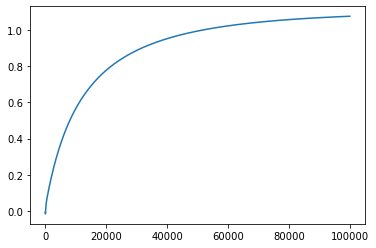

In [45]:
plt.plot(np.arange(len(losses3)),thetas3[:,0])

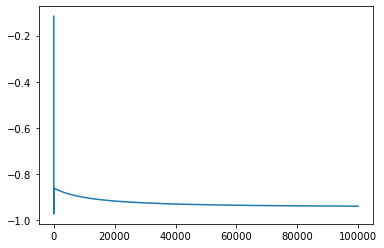

In [46]:
plt.plot(np.arange(len(losses3)),thetas3[:,1])